In [13]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium import Choropleth
from folium.plugins import HeatMap

In [14]:
bikeshare_stations = pd.read_csv('bikeshare_stations.csv')

In [15]:
start_2020and2021 = pd.read_csv('start_2020and2021.csv')
end_2020and2021 = pd.read_csv('end_2020and2021.csv')
start_2019 = pd.read_csv('start_2019.csv')
end_2019 = pd.read_csv('end_2019.csv')

In [16]:
start_2020 = pd.merge(start_2020and2021, bikeshare_stations.copy().rename(columns={"name": "Start Station Name"}), on='Start Station Name')
start_2019 = pd.merge(start_2019, bikeshare_stations.copy().rename(columns={"name": "Start Station Name"}), on='Start Station Name')
end_2020 = pd.merge(end_2020and2021, bikeshare_stations.copy().rename(columns={"name": "End Station Name"}), on='End Station Name')
end_2019 = pd.merge(end_2019, bikeshare_stations.copy().rename(columns={"name": "End Station Name"}), on='End Station Name')

In [17]:
bikeshare_stations_gdf = gpd.GeoDataFrame(bikeshare_stations, geometry=gpd.points_from_xy(bikeshare_stations['lon'], bikeshare_stations['lat']))
start_2020_gdf = gpd.GeoDataFrame(start_2020, geometry=gpd.points_from_xy(start_2020['lon'], start_2020['lat']))
end_2020_gdf = gpd.GeoDataFrame(end_2020, geometry=gpd.points_from_xy(end_2020['lon'], end_2020['lat']))
start_2019_gdf = gpd.GeoDataFrame(start_2019, geometry=gpd.points_from_xy(start_2019['lon'], start_2019['lat']))
end_2019_gdf = gpd.GeoDataFrame(end_2019, geometry=gpd.points_from_xy(end_2019['lon'], end_2019['lat']))

In [18]:
#load toronto neighborhoods
neighbourhoods = gpd.read_file('toronto_neighbourhoods.shp')
neighbourhoods = neighbourhoods[['FIELD_8','geometry']]
neighbourhoods['FIELD_8'] = neighbourhoods.FIELD_8.str.split('\(').str[0]
neighbourhoods.rename(columns={"FIELD_8": "name"}, inplace=True)

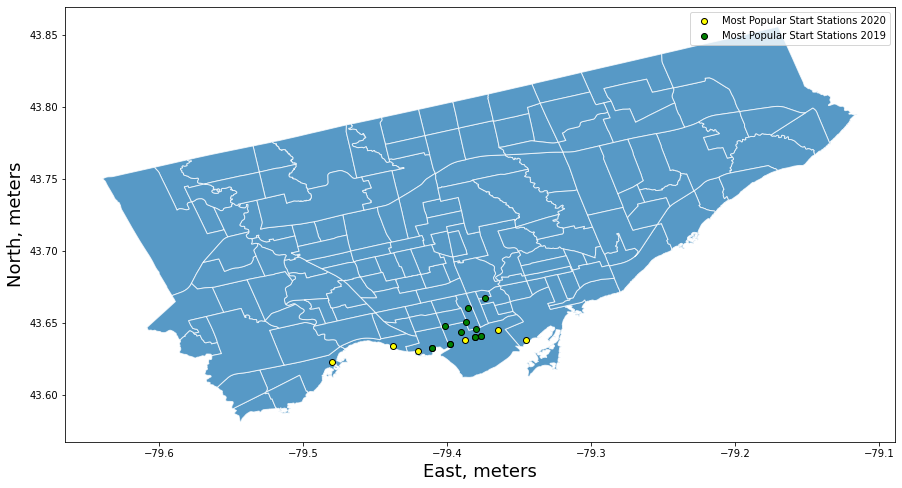

In [19]:
ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
#bikeshare_stations_gdf.plot(ax=ax, color='orange', edgecolor='k', label='Bike Stations')
start_2020_gdf.plot(ax=ax, color='yellow', edgecolor='k', label='Most Popular Start Stations 2020')
start_2019_gdf.plot(ax=ax, color='green', edgecolor='k', label='Most Popular Start Stations 2019')
plt.xlabel('East, meters', fontsize=18)
plt.ylabel('North, meters', fontsize=18)
ax.legend()
plt.savefig('popular start stations.png')

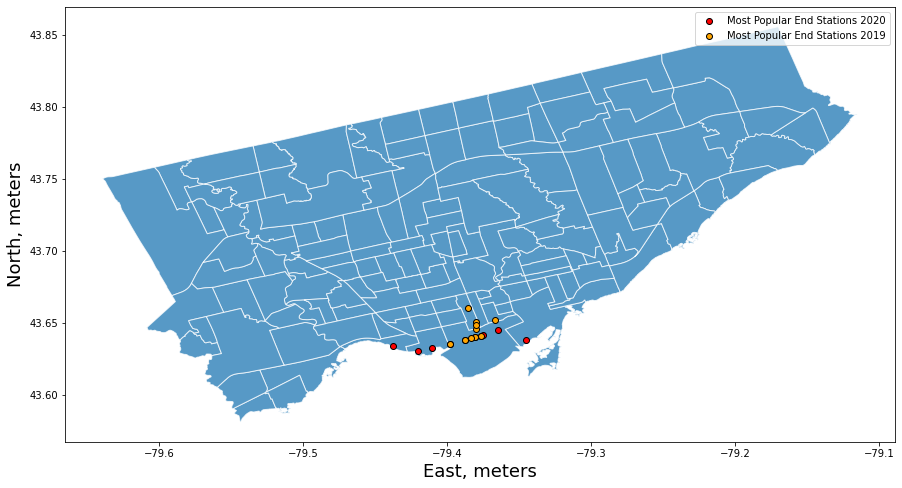

In [20]:
ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
end_2020_gdf.plot(ax=ax, color='red', edgecolor='k', label='Most Popular End Stations 2020')
end_2019_gdf.plot(ax=ax, color='orange', edgecolor='k', label='Most Popular End Stations 2019')
plt.xlabel('East, meters', fontsize=18)
plt.ylabel('North, meters', fontsize=18)
ax.legend()
plt.savefig('popular end stations.png')

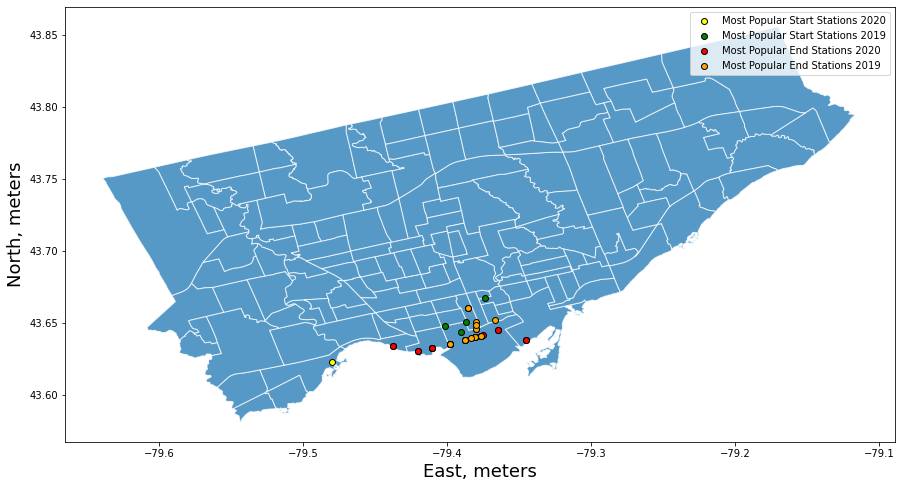

In [21]:
ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
#bikeshare_stations_gdf.plot(ax=ax, color='orange', edgecolor='k', label='Bike Stations')
start_2020_gdf.plot(ax=ax, color='yellow', edgecolor='k', label='Most Popular Start Stations 2020')
start_2019_gdf.plot(ax=ax, color='green', edgecolor='k', label='Most Popular Start Stations 2019')
end_2020_gdf.plot(ax=ax, color='red', edgecolor='k', label='Most Popular End Stations 2020')
end_2019_gdf.plot(ax=ax, color='orange', edgecolor='k', label='Most Popular End Stations 2019')
plt.xlabel('East, meters', fontsize=18)
plt.ylabel('North, meters', fontsize=18)
ax.legend()
plt.savefig('popular start and end stations.png')

In [10]:
from folium import Circle
from folium import Marker

In [11]:
# Create a map of Toronto
map_1 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)

# Add points to the map
for idx, row in start_2020_gdf.iterrows():
    Circle(location=[row.geometry.y, row.geometry.x],
           radius=100,
           color='blue').add_to(map_1)
for idx, row in end_2020_gdf.iterrows():
    Circle(location=[row.geometry.y, row.geometry.x],
           radius=50,
           color='red').add_to(map_1)
# for idx, row in start_2020_gdf.iterrows():
#     Marker(location=[row.geometry.y, row.geometry.x],
#            icon=folium.Icon(color='blue', prefix='fa')).add_to(map_1)
# for idx, row in end_2020_gdf.iterrows():
#     Marker(location=[row.geometry.y, row.geometry.x],
#            icon=folium.Icon(color='red', prefix='fa')).add_to(map_1)
    
for idx, row in start_2019_gdf.iterrows():
    Marker(location=[row.geometry.y, row.geometry.x],
           icon=folium.Icon(color='green', prefix='fa')).add_to(map_1)
for idx, row in end_2019_gdf.iterrows():
    Marker(location=[row.geometry.y, row.geometry.x],
           icon=folium.Icon(color='orange', prefix='fa')).add_to(map_1)

# Display map
map_1

In [12]:
map_1.save("map.html")